In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib
import lib_split
importlib.reload(lib_split)
from lib_split import retrieve_df
from lib_split import loadmat

ROOT = 'C:/Users/amcca/switchdrive/PhD/RR/'
OUTCOME_TYPE = 'procedural'

In [2]:
# for clinical outcomes, SR=1, AR=0
y_clin = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# for procedural outcomes, LT=1, NT=0
y_proc=np.array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

tau = 1
m = 2
coef = 0.10

# load in matlab data with appropriate params
filename = 'tau' + str(tau) + '_dim' + str(m) + '_coef' + str(coef) + '.mat'
bl_mat = loadmat(ROOT + 'data_split/rr_indices/baseline/' + filename)
end_mat = loadmat(ROOT + 'data_split/rr_indices/end ablation/' + filename)

# get each AF complexity index in column, each row corresponds to one patient only
data_dict_bl = bl_mat['rr_indices_struct']
data_matrix_bl = np.stack(list(data_dict_bl.values())).transpose()
feat_names = data_dict_bl.keys()

pts = np.arange(1,42)
pts = np.delete(pts, 32)
n_pts = len(pts)
n_files_per_pt = 5
pt_file_idx = 0

if OUTCOME_TYPE == 'clinical':
    y_tmp = y_clin
    outcome_names = ['AR', 'SR']
    order = ['SR', 'AR']
    hue_order = ['SR', 'AR']
elif OUTCOME_TYPE == 'procedural':
    y_tmp = y_proc
    outcome_names = ['NT', 'LT']
    order = ['LT', 'NT']
    hue_order = ['LT', 'NT']

# several RR segments for each patient
group = np.zeros((n_pts*n_files_per_pt))
y = np.zeros((n_pts*n_files_per_pt), dtype=np.int8)

# replicate outcome and group n_file_per_pt number of times
for pt_idx in range(n_pts):
    for file_nb in range(n_files_per_pt):
        y[pt_file_idx] = y_tmp[pt_idx]
        group[pt_file_idx] = pts[pt_idx]
        pt_file_idx += 1

### Graph 1: comparison barplot - ablation
of recurrence metrics by ablation step and outcome, for fixed $\tau$, $m$, and coef parameter combination.

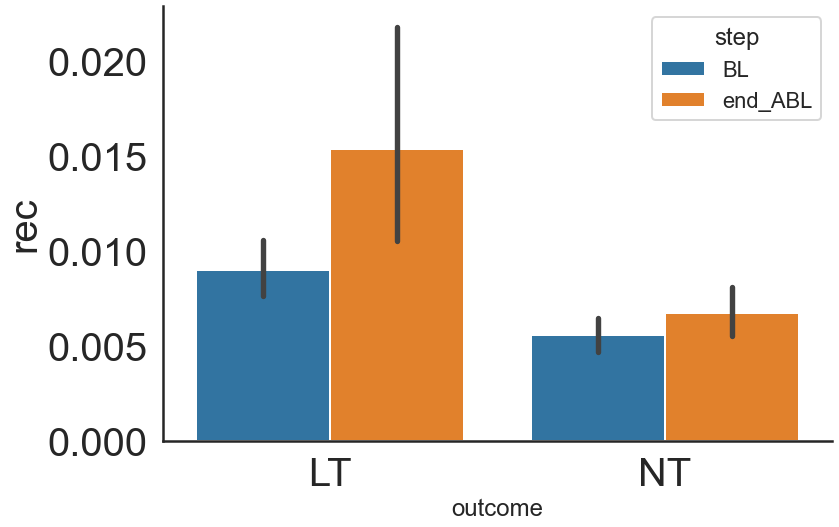

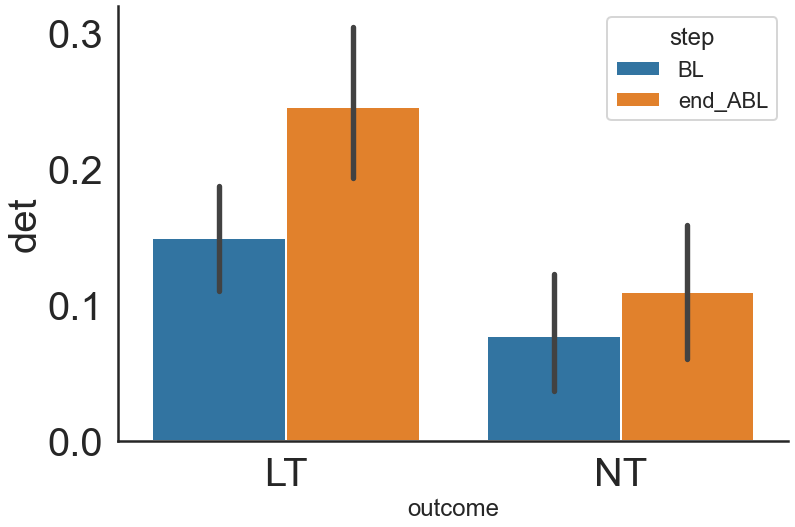

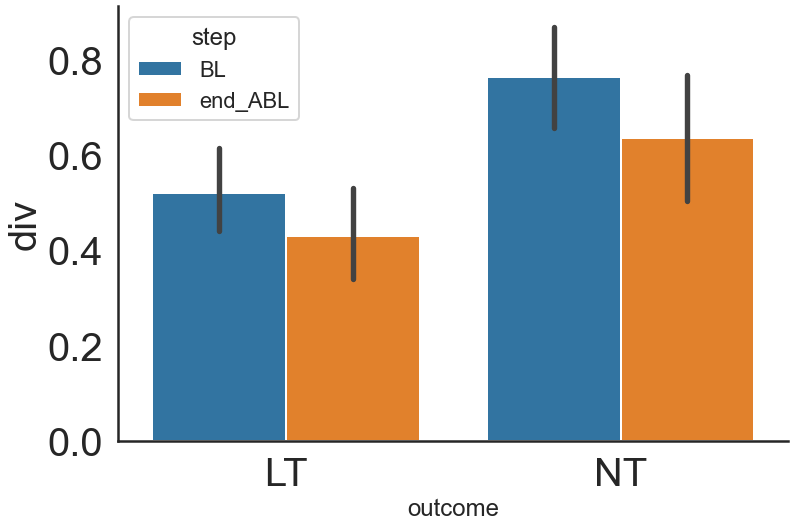

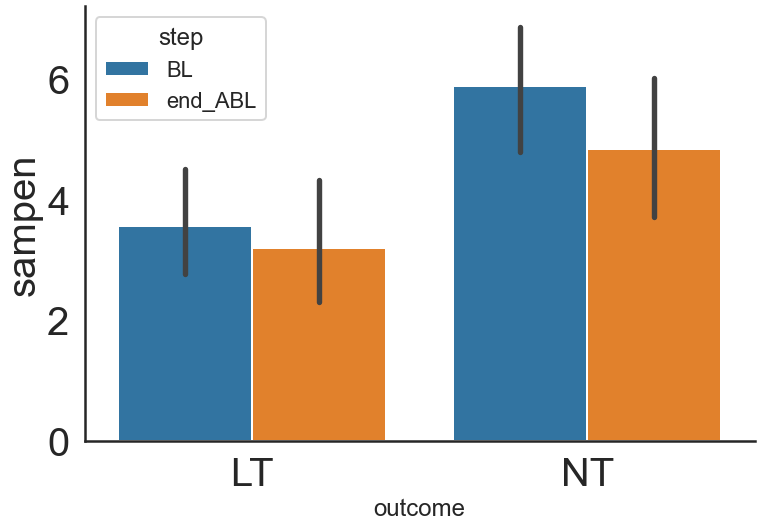

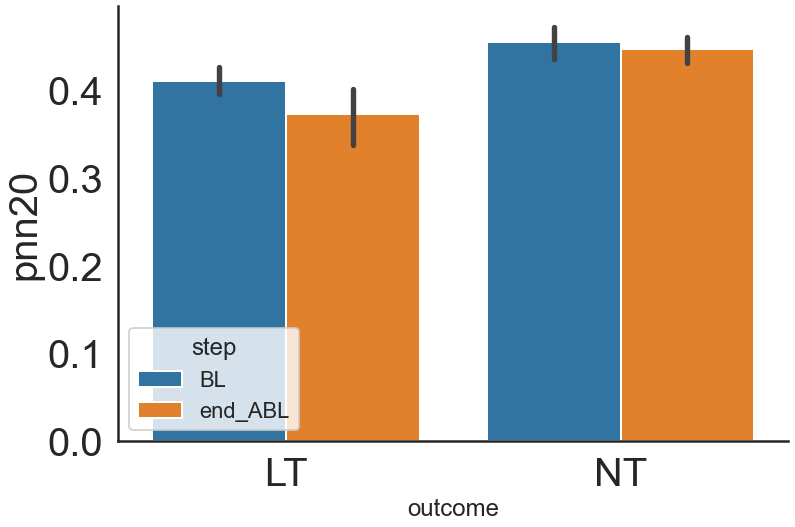

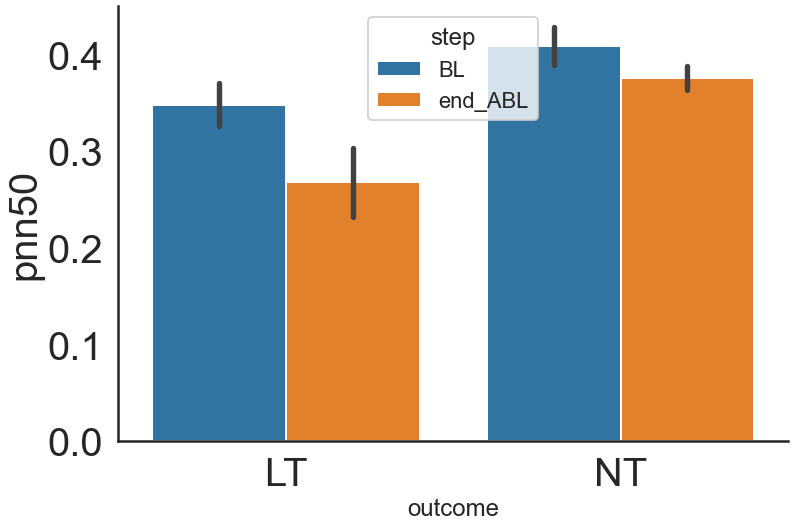

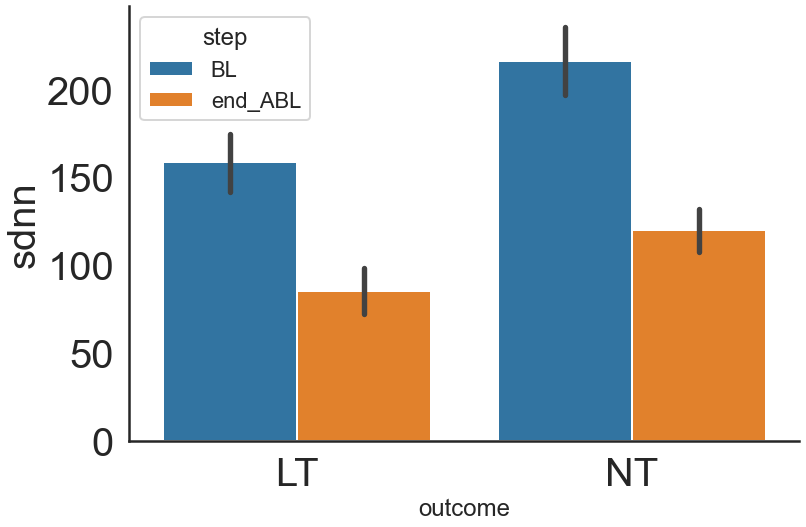

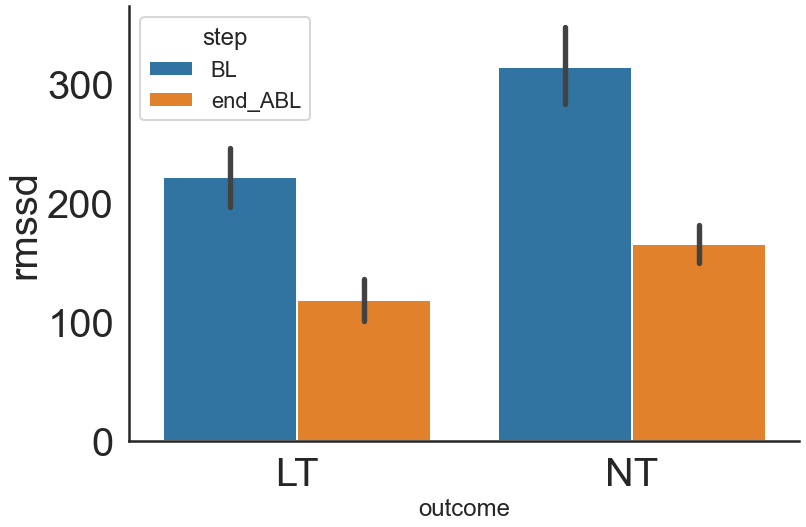

In [3]:
for feat_name in feat_names:
    df = retrieve_df(tau, m, coef, feat_name, y, outcome_names, pts)
    f = plt.figure(figsize=(12, 8))
    sns.set_style('white')
    sns.set_context('poster')
    ax = sns.barplot(x='outcome',y=feat_name,hue='step',order=order, data=df)
    ax.set_ylabel(feat_name,fontsize=40)
    ax.tick_params(axis='both',which='major',labelsize=40)
    #rotate_xtick = plt.xticks(rotation=45)
    sns.despine()
    plt.savefig(ROOT + 'figures/' + feat_name + '_abl_step.svg', format="svg")


### Graph 2: comparison barplot - outcome
of recurrence metrics by outcome, for fixed $\tau$, $m$ and coef parameter combination.

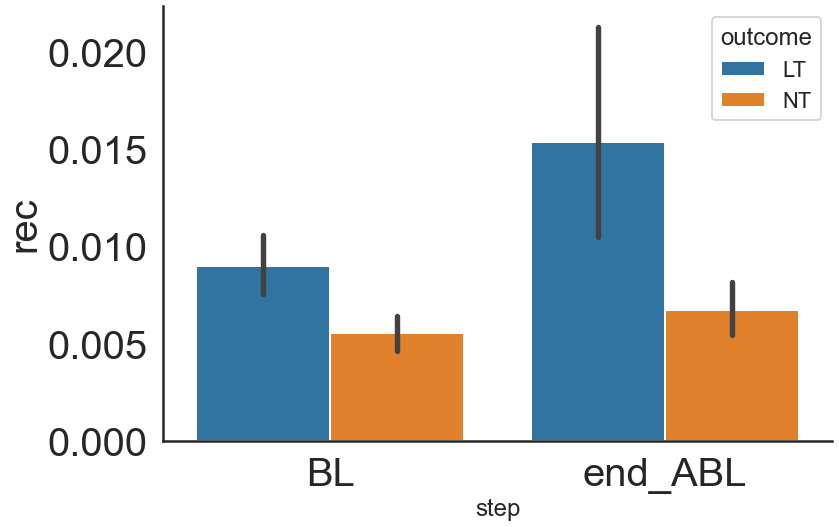

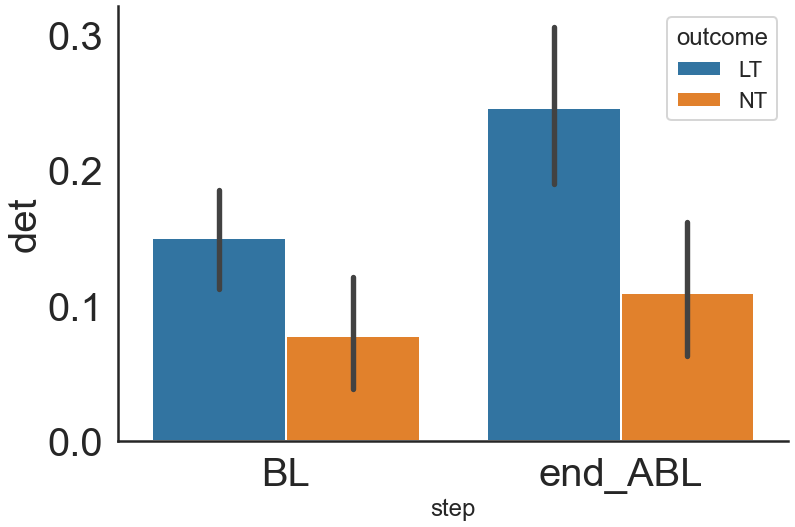

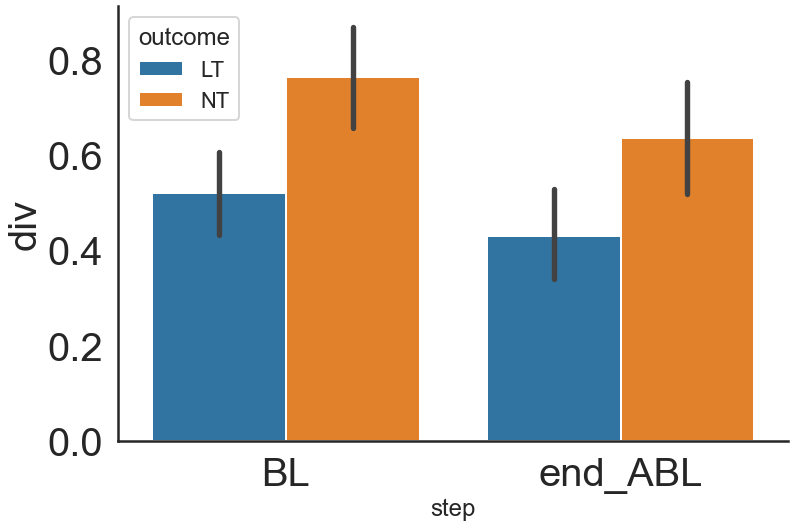

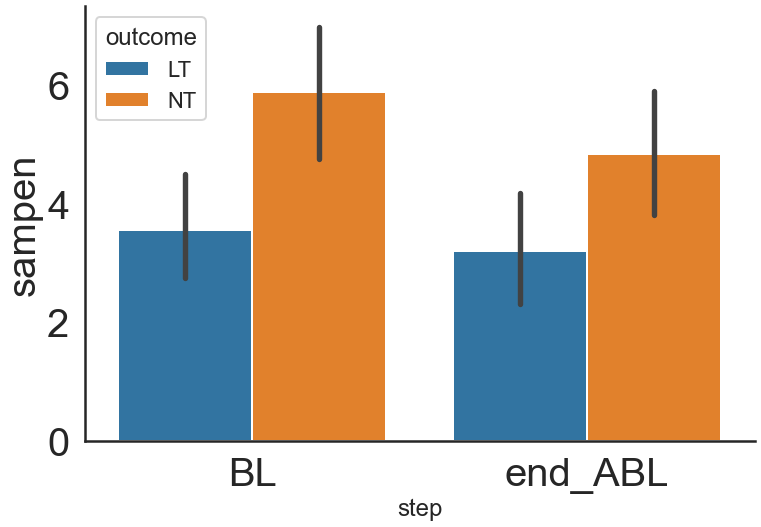

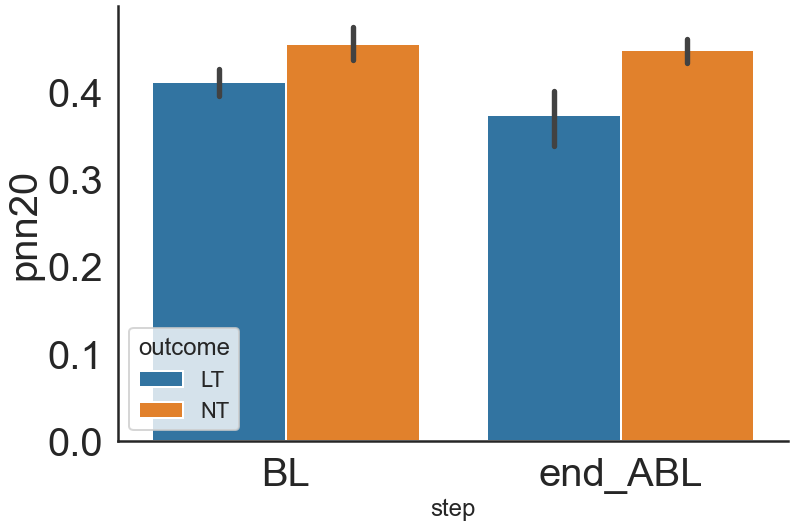

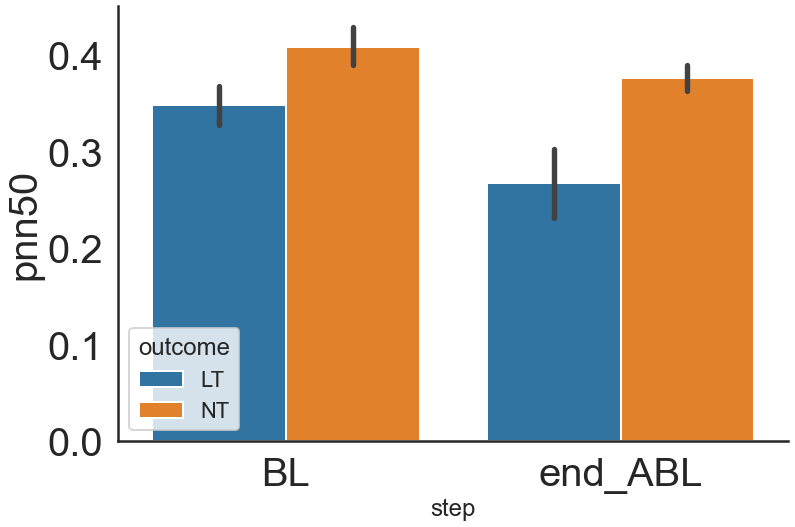

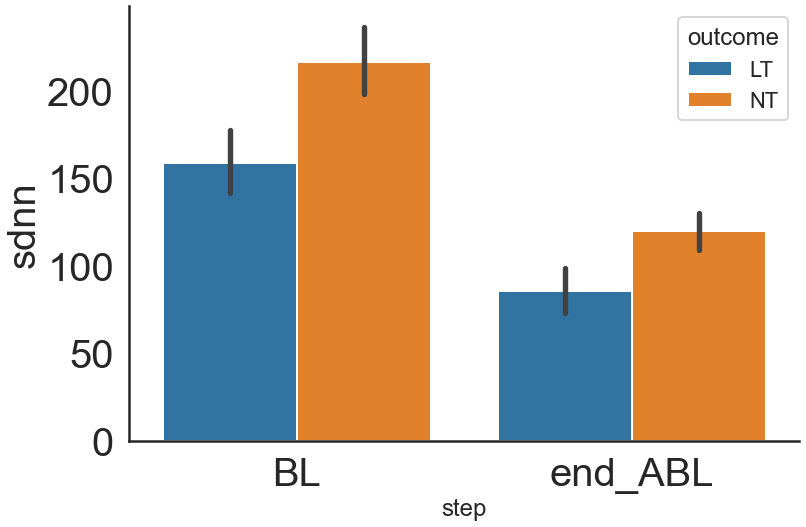

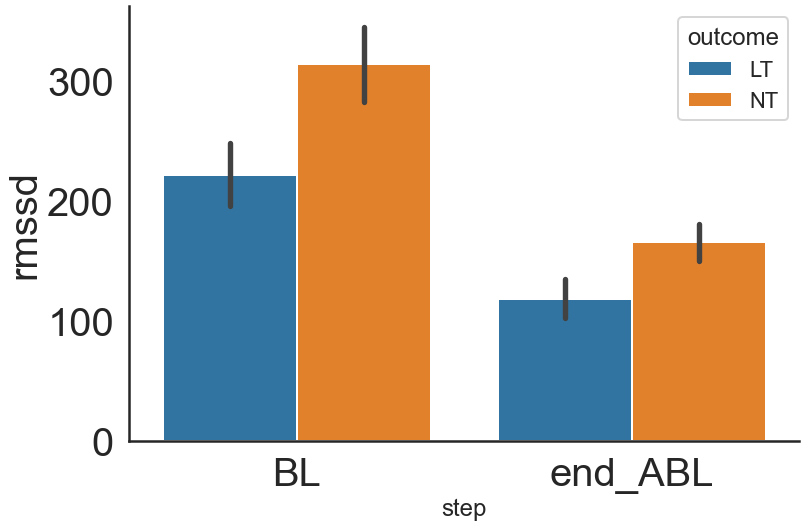

In [4]:
for feat_name in feat_names:
    df = retrieve_df(tau, m, coef, feat_name, y, outcome_names, pts)
    f = plt.figure(figsize=(12, 8))
    sns.set_style('white')
    sns.set_context('poster')
    ax = sns.barplot(x='step',y=feat_name,hue='outcome',order=['BL','end_ABL'], hue_order=hue_order, data=df)
    ax.set_ylabel(feat_name,fontsize=40)
    ax.tick_params(axis='both',which='major',labelsize=40)
    #rotate_xtick = plt.xticks(rotation=45)
    sns.despine()
    plt.savefig(ROOT + 'figures/' + feat_name + '_out.svg', format="svg")